In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki

In [2]:
from rooki import operators as ops

In [3]:
tas = ops.Input(
    'tas', ['c3s-cmip5.output1.MPI-M.MPI-ESM-LR.historical.mon.atmos.Amon.r1i1p1.tas.v20120315']
)

sub = ops.Subset(
    tas, 
    time="1990/1990", 
    time_components="month:jan,feb,mar")

wf = ops.Average(sub, dims="time")

In [4]:
resp = wf.orchestrate()
resp.ok

True

In [5]:
ds = resp.datasets()[0]
ds

<xarray.Dataset>
Dimensions:   (lat: 96, lon: 192, bnds: 2)
Coordinates:
  * lat       (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon       (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height    float64 ...
Dimensions without coordinates: bnds
Data variables:
    tas       (lat, lon) float32 ...
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-LR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-LR
    forcing:                GHG Oz SD Sl Vl LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-LR model output prepared for CMIP5 histor...
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.9

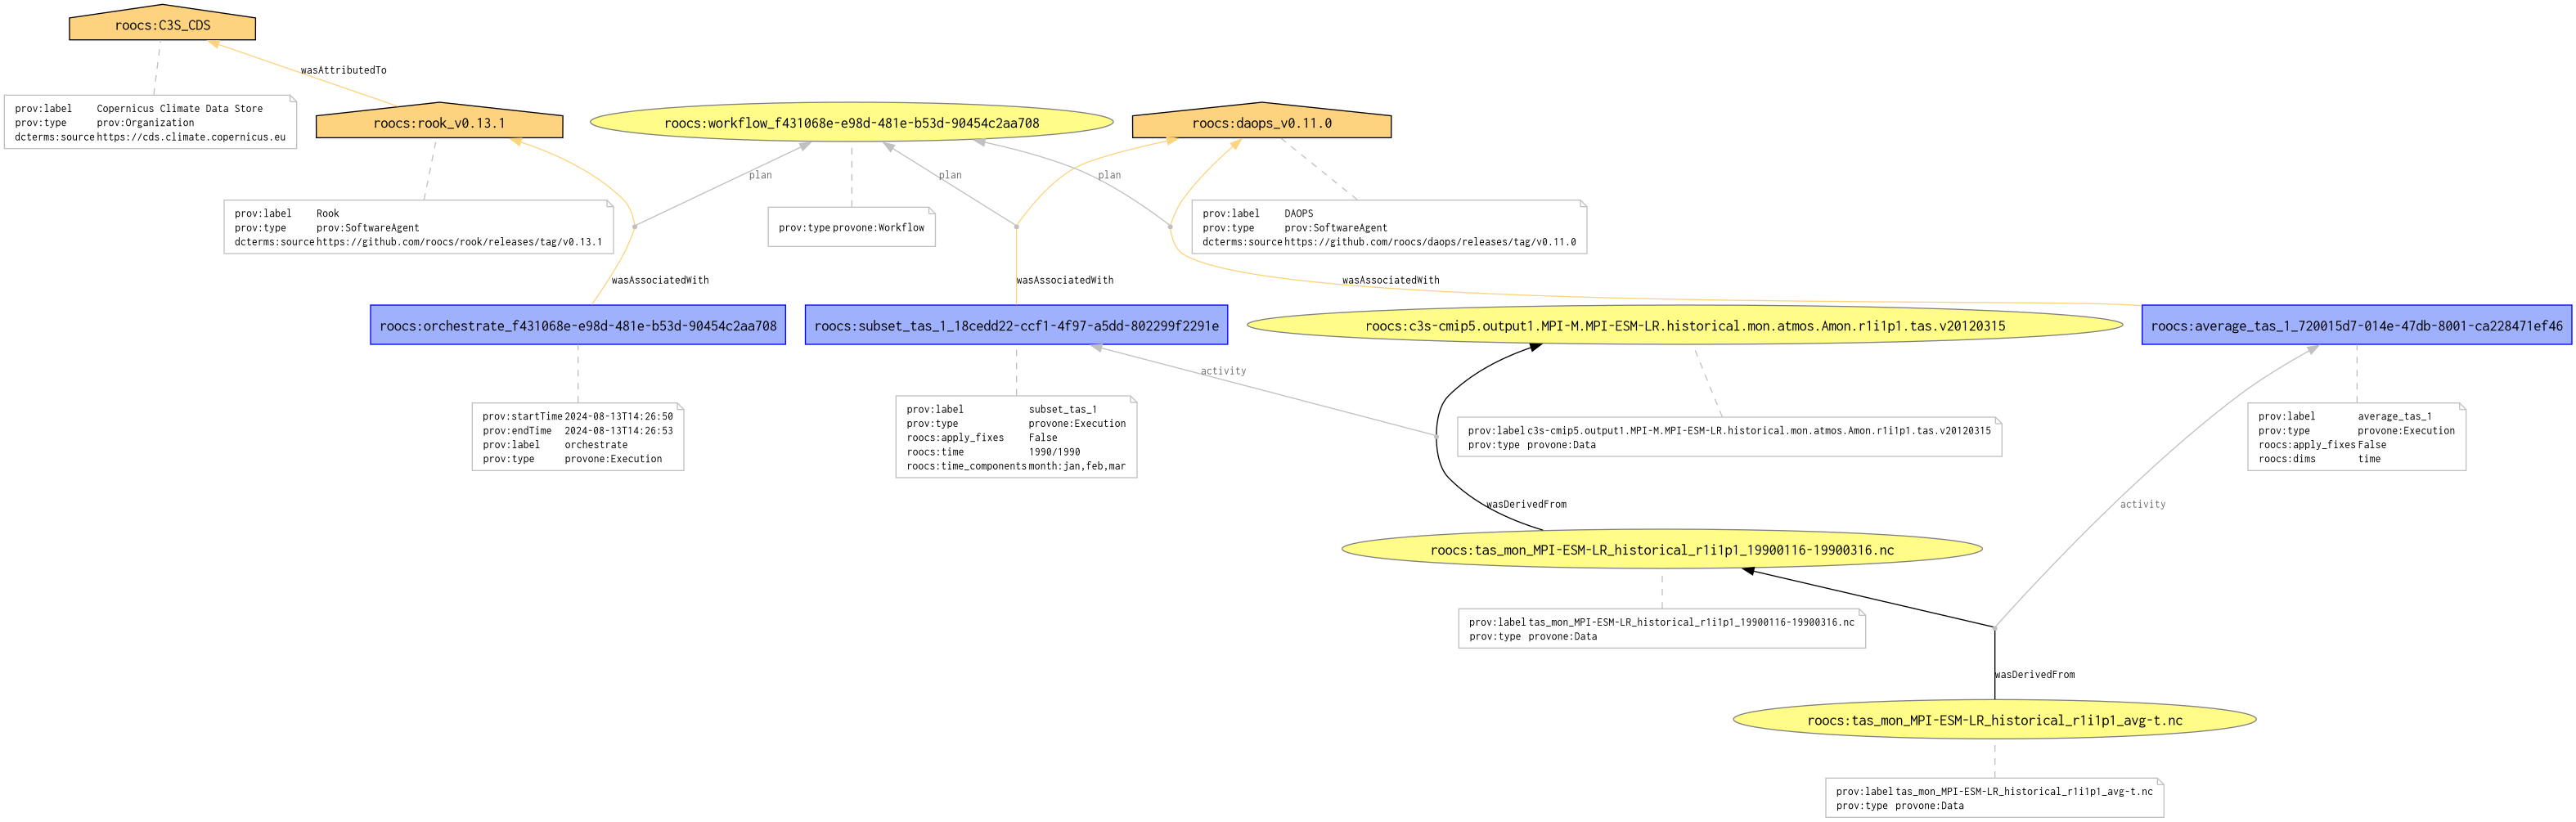

In [6]:
from IPython.display import Image
Image(resp.provenance_image())